## CMPINF2100 Week 12 | Making CLASSIFICATIONS with LOGISTIC REGRESSION

### Import Modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

### Read Data

We will use the SAME data set from last week

In [3]:
df = pd.read_csv('../week_11/week_11_intro_binary_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       115 non-null    float64
 1   y       115 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


In [5]:
df.nunique()

x    115
y      2
dtype: int64

In [6]:
df.y.value_counts()

y
0    67
1    48
Name: count, dtype: int64

### Fit the logistic regression model

Fit a model with a LINEAR RELATIONSHIP betweeen the LOGODDS RATIO and the INPUT.

In [8]:
fit_glm = smf.logit(formula='y ~ x', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.560099
         Iterations 6


In [9]:
fit_glm.params

Intercept   -0.449518
x            1.183814
dtype: float64

In [10]:
fit_glm.bse

Intercept    0.218009
x            0.267133
dtype: float64

In [11]:
fit_glm.pvalues

Intercept    0.039215
x            0.000009
dtype: float64

In [12]:
def my_coefplot( mod, figsize_use=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize_use)

    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)

    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')

    ax.set_xlabel('coefficient value')

    plt.show()

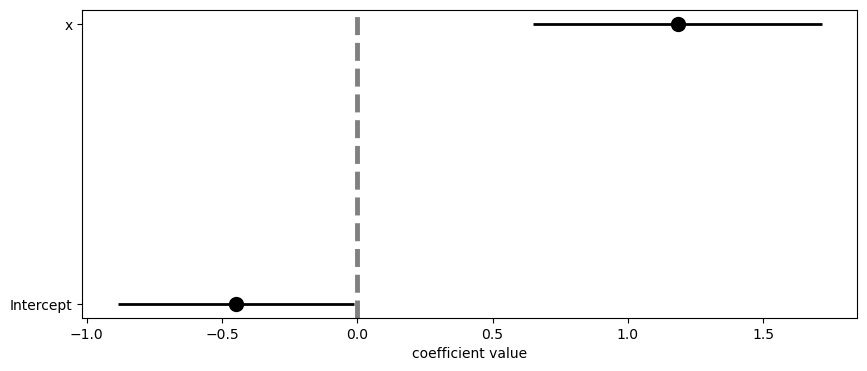

In [13]:
my_coefplot ( fit_glm )

### Predictions on a new data set

Let's visualize the PREDICTED PROBABILITY on a NEW visualization grid.

In [14]:
df.describe()

,x,y
count,115.000000,115.000000
mean,0.019188,0.417391
std,1.001227,0.495287
min,-2.059272,0.000000
25%,-0.721905,0.000000
50%,0.114752,0.000000
75%,0.570510,1.000000
max,2.438859,1.000000


In [15]:
dfviz = pd.DataFrame({'x': np.linspace(-2.75, 2.75, num=101)})

In [16]:
dfviz['pred_probability'] = fit_glm.predict( dfviz )

In [17]:
dfviz

,x,pred_probability
0,-2.750,0.024009
1,-2.695,0.025583
2,-2.640,0.027258
3,-2.585,0.029038
4,-2.530,0.030931
...,...,...
96,2.530,0.927273
97,2.585,0.931543
98,2.640,0.935580
99,2.695,0.939395


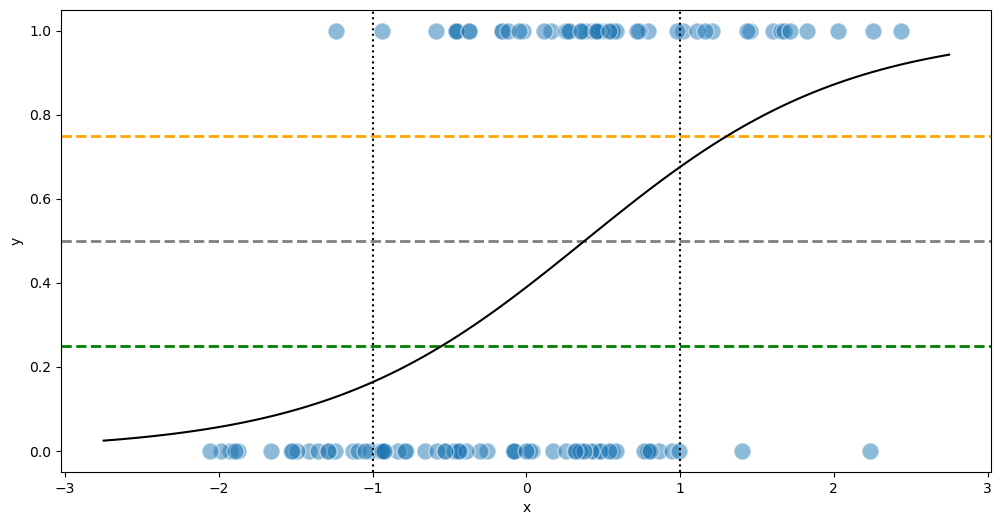

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(data = df, x='x', y='y', s=150, alpha=0.5)

ax.axhline(y=0.25, color='green', linestyle='--', linewidth=2)

ax.axhline(y=0.5, color='grey', linestyle='--', linewidth=2)

ax.axhline(y=0.75, color='orange', linestyle='--', linewidth=2)

ax.axvline(x=-1, color='black', linestyle=':')

ax.axvline(x=1, color='black', linestyle=':')

sns.lineplot(data = dfviz, x='x', y='pred_probability', color='k')

plt.show()

Let's reinforce the IDEA of probability vs EVENT and NON-EVENT one more time but using the TRAINING SET.

In [22]:
df_copy = df.copy()

Convert the continuous input into a NON-NUMERIC or CATEGORICAL variable. However, we will NOT directly make all unique values of the input categories. Instead, we will DISCRETIZE or **BIN** the input into **CUT** intervals. 

The `pd.cut()` function will **CUT** a continuous variable into **INTERVALS**.

In [23]:
df_copy.head()

,x,y
0,-0.457429,1
1,0.425948,1
2,-0.784695,0
3,-1.925209,0
4,2.252617,1


In [26]:
df_copy['x_bin'] = pd.cut( df.x, [df.x.min(), -1, 1, df.x.max()], include_lowest=True, ordered=True)

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x       115 non-null    float64 
 1   y       115 non-null    int64   
 2   x_bin   115 non-null    category
dtypes: category(1), float64(1), int64(1)
memory usage: 2.2 KB


In [28]:
df_copy.nunique()

x        115
y          2
x_bin      3
dtype: int64

In [29]:
df_copy.x_bin.value_counts()

x_bin
(-1.0, 1.0]      80
(-2.06, -1.0]    19
(1.0, 2.439]     16
Name: count, dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


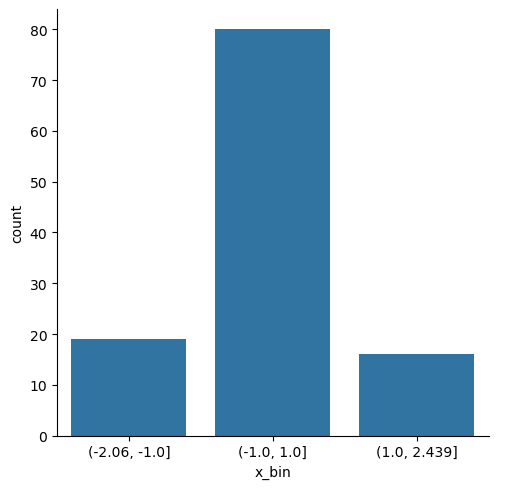

In [31]:
sns.catplot( data=df_copy, x='x_bin', kind='count')

plt.show()

Let's group and summarize within each input bin to calculate the NUMBER of EVENTS and the PROPORTION of EVENTS.

In [33]:
df_copy.groupby('x_bin').\
aggregate(num_rows = ('y', 'size'),
          num_events = ('y', 'sum'),
          prop_events = ('y', 'mean')).\
reset_index()

,x_bin,num_rows,num_events,prop_events
0,"(-2.06, -1.0]",19,1,0.052632
1,"(-1.0, 1.0]",80,33,0.412500
2,"(1.0, 2.439]",16,14,0.875000


Why does this matter???

The LOGISTIC REGRESSION MODEL does **NOT** CLASSIFY EVENT or NON-EVENT.

The LOGISTIC REGRESSION MODEL **PREDICTS** the EVENT PROBABILITY!

The EVENT PROBABILITY represents what we **EXPECT** to see!

It does NOT represent what an INDIVIDUAL OBSERVATION is. The PREDICTED PROBABILITY is teh **EXPECTED PROPERTION OF EVENTS!**

But how can we make a CLASSIFICATION of a SINGLE OBSERVATION?

### Decisions and Classification

We must CONVERT our PREDICTED PROBABILITY from a number between 0 and 1 to a CLASS or a BINARY value!

We must DECIDE which OUTPUT CATEGORY the observation is based on our PREDICTED PROBABILITY!

This *sounds* challenging, but making the decision is VERY STRAIGHT FORWARD. Making a decision is essentially sense.

CLASSIFICATION are created by comparing the PREDICTED PROBABILITY to a THRESHOLD VALUE.

- IF the PREDICTED PROBABILITY is **GREATER** than the THRESHOLD, we CLASSIFY the **EVENT**
- IF the PREDICTED PROBABILITY is **LESS THAN** the THRESHOLD, we CLASSIFY the **NON-EVENT**

Let's PREDICT the TRAINING SET instead of the VISUALIZATION GRID.

In [34]:
df_copy.head()

,x,y,x_bin
0,-0.457429,1,"(-1.0, 1.0]"
1,0.425948,1,"(-1.0, 1.0]"
2,-0.784695,0,"(-1.0, 1.0]"
3,-1.925209,0,"(-2.06, -1.0]"
4,2.252617,1,"(1.0, 2.439]"


In [35]:
df_copy.shape

(115, 3)

Make the prediction and assign the PREDICTED probability to a COLUMN.

In [36]:
df_copy['pred_probability'] = fit_glm.predict( df )

In [37]:
df_copy

,x,y,x_bin,pred_probability
0,-0.457429,1,"(-1.0, 1.0]",0.270709
1,0.425948,1,"(-1.0, 1.0]",0.513678
2,-0.784695,0,"(-1.0, 1.0]",0.201258
3,-1.925209,0,"(-2.06, -1.0]",0.061306
4,2.252617,1,"(1.0, 2.439]",0.901780
...,...,...,...,...
110,-0.791672,0,"(-1.0, 1.0]",0.199933
111,0.452238,1,"(-1.0, 1.0]",0.521449
112,0.535510,1,"(-1.0, 1.0]",0.545976
113,-0.532739,0,"(-1.0, 1.0]",0.253472


If the PREDICTED probability is GREATER than a threshold, we classify the EVENT

The COMMON and DEFAULT threshold is **50%**

In [39]:
df_copy.pred_probability > 0.5

0      False
1       True
2      False
3      False
4       True
       ...  
110    False
111     True
112     True
113    False
114    False
Name: pred_probability, Length: 115, dtype: bool

"I prefer to CLASSIFY using the `np.where()` function." - Professor

This is an IN-LINE IF-ELSE statement.

`np.where( <Conditional Test>, <Value If True>, <Value If False> )`

In [40]:
np.where( df_copy.pred_probability > 0.5, 1, 0 )

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0])

In [41]:
df_copy

,x,y,x_bin,pred_probability
0,-0.457429,1,"(-1.0, 1.0]",0.270709
1,0.425948,1,"(-1.0, 1.0]",0.513678
2,-0.784695,0,"(-1.0, 1.0]",0.201258
3,-1.925209,0,"(-2.06, -1.0]",0.061306
4,2.252617,1,"(1.0, 2.439]",0.901780
...,...,...,...,...
110,-0.791672,0,"(-1.0, 1.0]",0.199933
111,0.452238,1,"(-1.0, 1.0]",0.521449
112,0.535510,1,"(-1.0, 1.0]",0.545976
113,-0.532739,0,"(-1.0, 1.0]",0.253472


Let's assign the PREDICTED CLASSIFICATIONS to a NEW column!

In [42]:
df_copy['pred_class'] = np.where( df_copy.pred_probability > 0.5, 1, 0 )

In [43]:
df_copy

,x,y,x_bin,pred_probability,pred_class
0,-0.457429,1,"(-1.0, 1.0]",0.270709,0
1,0.425948,1,"(-1.0, 1.0]",0.513678,1
2,-0.784695,0,"(-1.0, 1.0]",0.201258,0
3,-1.925209,0,"(-2.06, -1.0]",0.061306,0
4,2.252617,1,"(1.0, 2.439]",0.901780,1
...,...,...,...,...,...
110,-0.791672,0,"(-1.0, 1.0]",0.199933,0
111,0.452238,1,"(-1.0, 1.0]",0.521449,1
112,0.535510,1,"(-1.0, 1.0]",0.545976,1
113,-0.532739,0,"(-1.0, 1.0]",0.253472,0


In [44]:
df_copy.pred_class.value_counts()

pred_class
0    72
1    43
Name: count, dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


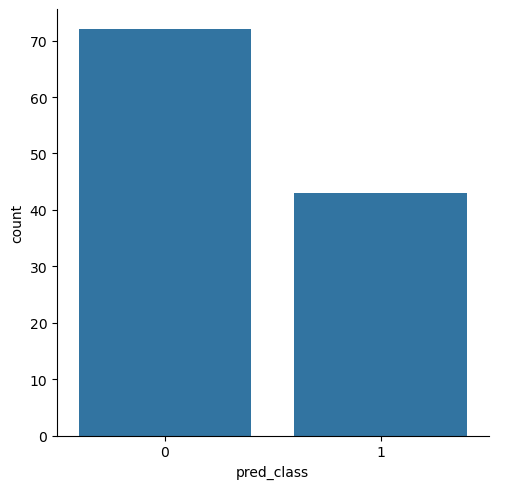

In [45]:
sns.catplot(data = df_copy, x='pred_class', kind='count')

plt.show()